# EXPLORATORY DATA ANALYSIS ON BIKE SALES 
# WITH ADVENTURE WORKS DATASET

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.reset_option("^display")

### Datasets are loaded

In [219]:

#Csv files are called
 


sale_2015 = pd.read_csv(r"C:\Users\louie\Documents\Data Analytics\Dataset_Used\_Dataset Used\AW_Sales\AdventureWorks_Sales_2015.csv", parse_dates=['OrderDate', 'StockDate'])
sale_2016 = pd.read_csv(r"C:\Users\louie\Documents\Data Analytics\Dataset_Used\_Dataset Used\AW_Sales\AdventureWorks_Sales_2016.csv", parse_dates=['OrderDate', 'StockDate'])
sale_2017 = pd.read_csv(r"C:\Users\louie\Documents\Data Analytics\Dataset_Used\_Dataset Used\AW_Sales\AdventureWorks_Sales_2017.csv", parse_dates=['OrderDate', 'StockDate'])
calendar = pd.read_csv(r"C:\Users\louie\Documents\Data Analytics\Dataset_Used\_Dataset Used\AdventureWorks_Calendar.csv")
customer= pd.read_csv(r"C:\Users\louie\Documents\Data Analytics\Dataset_Used\_Dataset Used\AdventureWorks_Customers.csv", encoding='latin1')
category= pd.read_csv(r"C:\Users\louie\Documents\Data Analytics\Dataset_Used\_Dataset Used\AdventureWorks_Product_Categories.csv")
subcategory = pd.read_csv(r"C:\Users\louie\Documents\Data Analytics\Dataset_Used\_Dataset Used\AdventureWorks_Product_Subcategories.csv")
product= pd.read_csv(r"C:\Users\louie\Documents\Data Analytics\Dataset_Used\_Dataset Used\AdventureWorks_Products.csv")
territory= pd.read_csv(r"C:\Users\louie\Documents\Data Analytics\Dataset_Used\_Dataset Used\AdventureWorks_Territories.csv")

### Sales data between 2015 to 2017 are appended to form a single sale dataset.


In [220]:
sale = pd.concat([sale_2015,sale_2016,sale_2017])
sale= sale.dropna()
sale_column_mapping = {'OrderDate': 'order_date',
                       'StockDate': 'stock_date',
                       'OrderNumber':'order_number',
                       'ProductKey':'product_key',
                       'CustomerKey':'customer_key',
                       'TerritoryKey':'territory_key',
                       'OrderLineItem':'order_line_item',
                       'OrderQuantity':'order_quantity',
                       'UnitPriceSold':'unit_price_sold'}



### Column names are changed for uniformity.

In [221]:
sale.rename(columns=sale_column_mapping, inplace=True)
print(sale.info())





<class 'pandas.core.frame.DataFrame'>
Index: 56046 entries, 0 to 29480
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_date       56046 non-null  datetime64[ns]
 1   stock_date       56046 non-null  datetime64[ns]
 2   order_number     56046 non-null  object        
 3   product_key      56046 non-null  int64         
 4   customer_key     56046 non-null  int64         
 5   territory_key    56046 non-null  int64         
 6   order_line_item  56046 non-null  int64         
 7   order_quantity   56046 non-null  int64         
 8   unit_price_sold  56046 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(1)
memory usage: 4.3+ MB
None


### Change column names for other datasets

In [222]:
calendar.rename(columns={'Date':'date'}, inplace=True)
customer_column_mapping ={
    'CustomerKey':'customer_key',
    'Prefix': 'prefix',
    'FirstName': 'first_name',
    'LastName': 'last_name',
    'BirthDate': 'birth_date',
    'MaritalStatus': 'marital_status',
    'Gender': 'gender',
    'EmailAddress': 'email_address',
    'AnnualIncome': 'annual_income',
    'TotalChildren': 'total_children',
    'EducationLevel': 'education_level',
    'Occupation': 'occupation',
    'HomeOwner': 'home_owner'
}
customer.rename(columns=customer_column_mapping, inplace=True)

category_column_mapping = {'ProductCategoryKey':'product_category_key',
                           'CategoryName':'category_name'}

category.rename(columns=category_column_mapping, inplace=True)

subcategory_column_mapping ={
    'ProductSubcategoryKey': 'product_subcategory_key',
    'SubcategoryName': 'subcategory_name',
    'ProductCategoryKey': 'product_category_key'
}
subcategory.rename(columns=subcategory_column_mapping, inplace=True)

product_column_mapping = {
    'ProductKey': 'product_key',
    'ProductSubcategoryKey': 'product_subcategory_key',
    'ProductSKU': 'product_sku',
    'ProductName':'product_name',
    'ModelName': 'model_name',
    'ProductDescription': 'product_description',
    'ProductColor': 'product_color',
    'ProductSize': 'product_size',
    'ProductStyle': 'product_style',
    'ProductCost': 'product_cost',
    'ProductPrice': 'product_price'
}

product.rename(columns=product_column_mapping, inplace=True)

territory_column_mapping = {
    'SalesTerritoryKey': 'sale_territory_key',
    'Region': 'region',
    'Country': 'country',
    'Continent': 'continent'
}


territory.rename(columns=territory_column_mapping, inplace=True)


## Remove Duplicate rows and NaN values

In [223]:
##SALE DATAFRAME

#it seems that there are duplicated rows in the sale dataframe
sale.index.duplicated().sum()

#show duplicate
sale[sale.index.duplicated(keep=False)]

#drop Nan values
sale.dropna()

#drop duplicate
sale.drop_duplicates(inplace=True)

sale.reset_index(drop=True, inplace=True)

##chech other datadrame for duplicates
product[product.duplicated()]
calendar[calendar.duplicated()]
customer[customer.duplicated()]
category[category.duplicated()]
subcategory[subcategory.duplicated()]


,product_subcategory_key,subcategory_name,product_category_key


## Check for missing values

In [224]:
for col in sale.columns:
    pct_missing = np.mean(sale[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



order_date - 0%
stock_date - 0%
order_number - 0%
product_key - 0%
customer_key - 0%
territory_key - 0%
order_line_item - 0%
order_quantity - 0%
unit_price_sold - 0%


## Data Cleaning

#### Sale df

In [225]:
#create years, month and day column

sale['order_date'] = sale['order_date'].astype(str)
sale['order_year'] = sale['order_date'].str[0:4]
sale['order_month'] = sale['order_date'].str[5:7]
sale['order_month'] = sale['order_month'].astype(int)
sale['order_day'] = sale['order_date'].str[8:10]

#convert mmonth to names
number_to_month = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}


sale['order_month'] = sale['order_month'].map(number_to_month)

sale['order_date'] = pd.to_datetime(sale['order_date'])

sale['name_of_day'] = sale['order_date'].apply(lambda x : x.strftime('%A') )

sale['unit_price_sold'] = sale['unit_price_sold'].astype(float).round(2)

sale



,order_date,stock_date,order_number,product_key,customer_key,territory_key,order_line_item,order_quantity,unit_price_sold,order_year,order_month,order_day,name_of_day
0,2015-01-01,2001-09-21,SO45080,332,14657,1,1,1,699.10,2015,January,01,Thursday
1,2015-01-01,2001-12-05,SO45079,312,29255,4,1,1,3578.27,2015,January,01,Thursday
2,2015-01-01,2001-10-29,SO45082,350,11455,9,1,1,3374.99,2015,January,01,Thursday
3,2015-01-01,2001-11-16,SO45081,338,26782,6,1,1,699.10,2015,January,01,Thursday
4,2015-01-02,2001-12-15,SO45083,312,14947,10,1,1,3578.27,2015,January,02,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56041,2017-06-30,2004-03-22,SO74143,477,28517,10,3,2,4.99,2017,June,30,Friday
56042,2017-06-30,2004-03-15,SO74143,479,28517,10,2,1,8.99,2017,June,30,Friday
56043,2017-06-30,2004-04-08,SO74143,606,28517,10,1,1,539.99,2017,June,30,Friday
56044,2017-06-30,2004-05-15,SO74124,480,21676,7,2,2,2.29,2017,June,30,Friday


#### product df

In [226]:
#unique_product = product['product_description'].unique()
#unique_product
product['product_cost'] = product['product_cost'].round(2)
product['product_price'] = product['product_price'].round(2)
product

,product_key,product_subcategory_key,product_sku,product_name,model_name,product_description,product_color,product_size,product_style,product_cost,product_price
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.09,34.99
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.03,33.64
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.40,9.50
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.40,9.50
4,220,31,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.03,33.64
...,...,...,...,...,...,...,...,...,...,...,...
288,602,5,BB-8107,ML Bottom Bracket,ML Bottom Bracket,Aluminum alloy cups; large diameter spindle.,NaN,0,0,44.95,101.24
289,603,5,BB-9108,HL Bottom Bracket,HL Bottom Bracket,Aluminum alloy cups and a hollow axle.,NaN,0,0,53.94,121.49
290,604,2,BK-R19B-44,"Road-750 Black, 44",Road-750,Entry level adult bike; offers a comfortable r...,Black,44,U,343.65,539.99
291,605,2,BK-R19B-48,"Road-750 Black, 48",Road-750,Entry level adult bike; offers a comfortable r...,Black,48,U,343.65,539.99


#### customer df

In [227]:
gender_word = {'M':'Male', 'F':'Female'}
marital_word = {'M':'Married', 'S':'Single'}
home_owner_word = {'Y':'Yes', 'N':'No'}

In [228]:
customer['gender'] =customer['gender'].map(gender_word)
customer['marital_status']= customer['marital_status'].map(marital_word)
customer['home_owner'] = customer['home_owner'].map(home_owner_word)

In [229]:
customer

,customer_key,prefix,first_name,last_name,birth_date,marital_status,gender,email_address,annual_income,total_children,education_level,occupation,home_owner
0,11000,MR.,JON,YANG,4/8/1966,Married,Male,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Yes
1,11001,MR.,EUGENE,HUANG,5/14/1965,Single,Male,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,No
2,11002,MR.,RUBEN,TORRES,8/12/1965,Married,Male,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Yes
3,11003,MS.,CHRISTY,ZHU,2/15/1968,Single,Female,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,No
4,11004,MRS.,ELIZABETH,JOHNSON,8/8/1968,Single,Female,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,MR.,TOMMY,TANG,7/4/1958,Married,Male,tommy2@adventure-works.com,"$30,000",1,Graduate Degree,Clerical,Yes
18144,29480,MRS.,NINA,RAJI,11/10/1960,Single,Female,nina21@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,Yes
18145,29481,MR.,IVAN,SURI,1/5/1960,Single,Male,ivan0@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,No
18146,29482,MR.,CLAYTON,ZHANG,3/5/1959,Married,Male,clayton0@adventure-works.com,"$30,000",3,Bachelors,Clerical,Yes


#### Other data frames does not need cleaning.

# ANALYZE ANSD VISUALIZE

#### Number of customers based on customer key

In [230]:


#total number of customers
total_customer=sale.customer_key.count()
print("customer: " + str(total_customer))

customer: 56046


#### Total Sale from the year 2015 to 2017

In [231]:
#total product cost
#merge sale and products column

sale_product=sale.merge(product, how='outer')
#print(sale_product.head(1))

In [232]:
#total sale

total_sale= sale.unit_price_sold * sale.order_quantity
total_sale=total_sale.sum()
total_sale_format= "${:,.2f}".format(total_sale)

print("total sale: " +total_sale_format)

total sale: $24,914,567.18


#### Total Product Cost from 2015 to 2017

In [233]:
#total product cost

total_product_cost=sale_product.product_cost*sale_product.order_quantity
total_product_cost=total_product_cost.sum()
total_product_cost_format="${:,.2f}".format(total_product_cost)
print("total_product_cost: "+total_product_cost_format)

total_product_cost: $14,456,986.32


#### Total Profit From 2015 to 2017

In [237]:
#total profit
total_profit = float(total_sale) - float(total_product_cost)
total_profit_format='${:,.2f}'.format(total_profit)
print('total_profit: '+total_profit_format)


total_profit: $10,457,580.86


## Which subcategory of bike has the highest amount of sales?

In [238]:
#merge products, category, subcategory to sale data

sale_subcategory= sale_product.merge(subcategory, how='outer')
sale_category=sale_subcategory.merge(category, how = 'outer')
sale_category['total_price']=(sale_subcategory.product_price * sale_subcategory.order_quantity)

#print(sale_category)

In [239]:
#ranking of sale in terms of subcategory

subcategory_rank=sale_subcategory[['subcategory_name','product_name','product_price','order_quantity']]

#drop na in order_quantity
subcategory_rank=subcategory_rank.dropna(subset=['order_quantity'])

#first create the total_cost column by multiplying columns product_price and order_quantity
subcategory_rank['total_sale']= subcategory_rank.product_price * subcategory_rank.order_quantity

#group by subcategory_name
subcategory_rank=subcategory_rank.groupby(['subcategory_name'])['total_sale'].sum().reset_index()
#sort to descending format
subcategory_rank=subcategory_rank.sort_values('total_sale', ascending=False)
subcategory_rank_format = subcategory_rank.sort_values('total_sale', ascending=False)
#sum of sale by subcategory
subcategory_sum = subcategory_rank.sum()


#apply format with lambda
subcategory_rank_format['total_sale']=subcategory_rank.apply(lambda x:'${:,.2f}'.format(x['total_sale']), axis=1)


print(subcategory_rank_format)
#print(subcategory_rank)
print(subcategory_sum)



     subcategory_name      total_sale
11         Road Bikes  $11,287,183.77
10     Mountain Bikes   $8,583,751.63
15      Touring Bikes   $3,771,564.66
14    Tires and Tubes     $380,826.68
7             Helmets     $205,817.41
9             Jerseys     $158,569.27
2   Bottles and Cages     $107,744.94
5             Fenders      $87,040.80
12             Shorts      $66,070.56
6              Gloves      $62,266.20
8     Hydration Packs      $38,218.05
1         Bike Stands      $37,206.00
0          Bike Racks      $36,240.00
3                Caps      $35,864.64
16              Vests      $33,083.50
4            Cleaners      $13,562.70
13              Socks       $9,556.37
subcategory_name    Road BikesMountain BikesTouring BikesTires and...
total_sale                                                24914567.18
dtype: object


#### Barchart

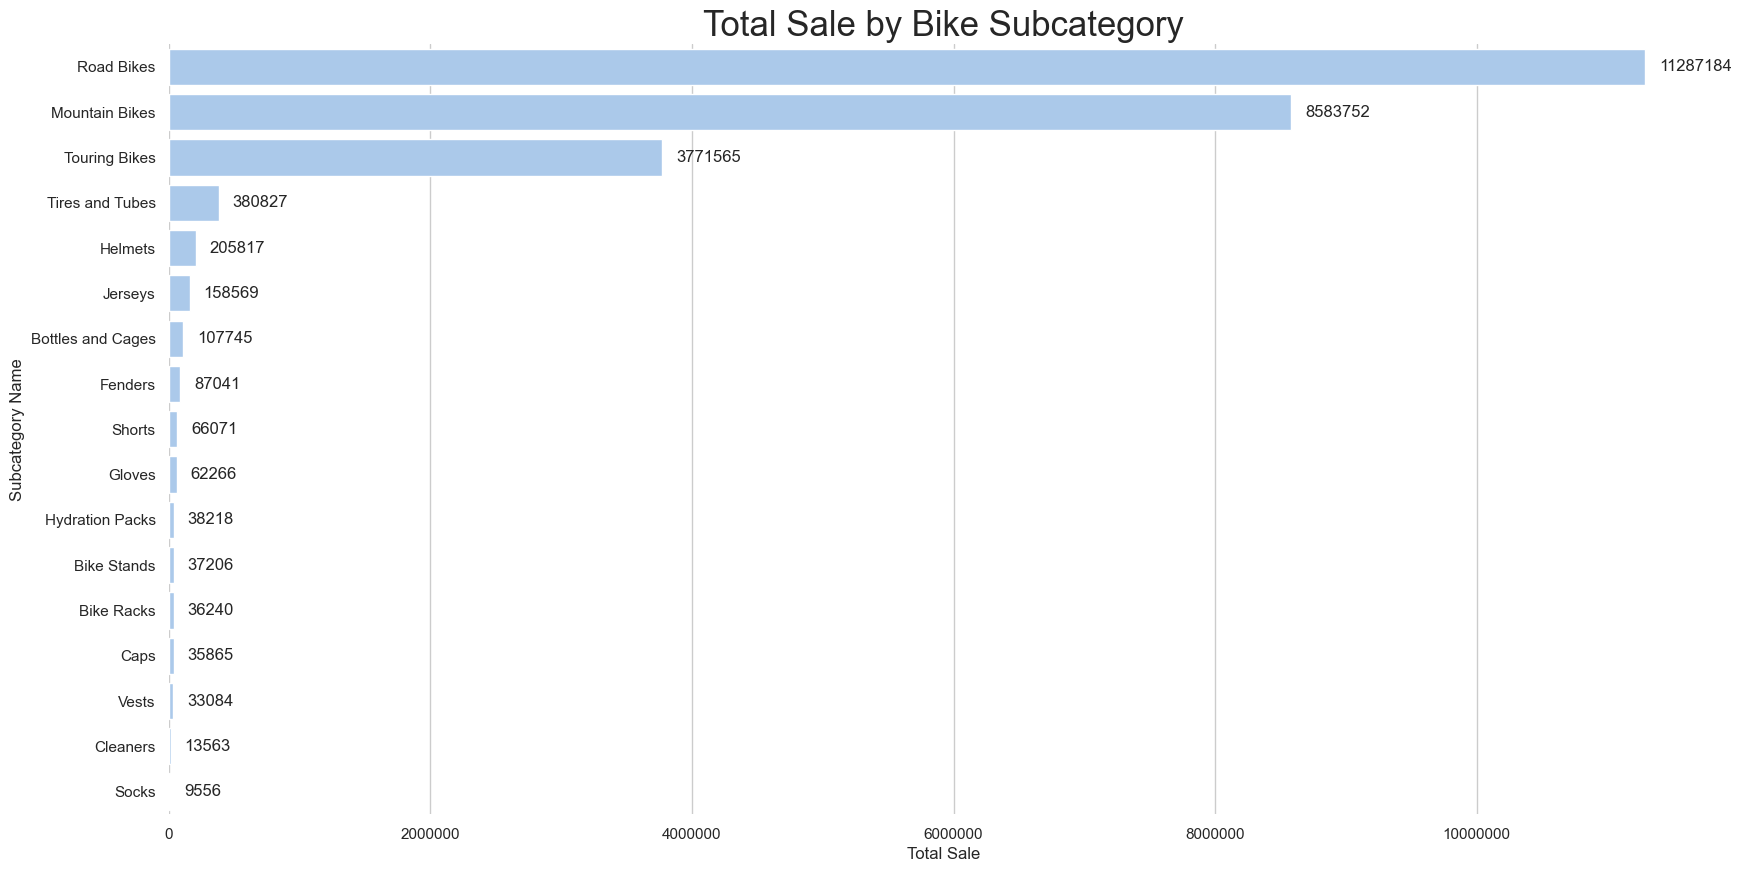

In [240]:
sns.set_theme(style='whitegrid', palette='pastel', color_codes=True)


f, ax = plt.subplots(figsize=(20, 10))

barplot = sns.barplot(x= 'total_sale', y='subcategory_name', data=subcategory_rank, ax=ax ,color='b')


# create bar value


for p in barplot.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha = 'left', va = 'center',
                fontsize =12,
                xytext = (10,0),
                textcoords = 'offset points')
    
    

plt.title('Total Sale by Bike Subcategory', fontsize= 25)
plt.xlabel('Total Sale')
plt.ylabel('Subcategory Name')

# Format the x-axis ticks as millions with commas
#number_format = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1e6))
#ax.xaxis.set_major_formatter(number_format)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))

sns.despine(left=True, bottom=True)

plt.show()

## In which country does the highest amount of sales occur?

In [241]:
sale_territory = sale.merge(territory, how='outer', left_on='territory_key', right_on='sale_territory_key' )
sale_territory['total_sale']=sale_territory['unit_price_sold']*sale_territory['order_quantity']

rank_country = sale_territory[['country','region','order_quantity','unit_price_sold', 'total_sale']]

rank_country= rank_country.groupby(['country'])['total_sale'].sum().reset_index()

rank_country= rank_country.sort_values('total_sale', ascending=False)
rank_country_format = rank_country.sort_values('total_sale', ascending=False)

rank_country_format['total_sale'] = rank_country.apply(lambda x: '${:,.2f}'.format(x['total_sale']), axis=1)



#print(rank_country)
print(rank_country_format)


print(rank_country['total_sale'].sum())



          country     total_sale
5   United States  $7,938,994.29
0       Australia  $7,416,451.76
4  United Kingdom  $2,902,558.90
3         Germany  $2,524,677.34
2          France  $2,362,641.01
1          Canada  $1,769,243.88
24914567.179999996


#### Barchart

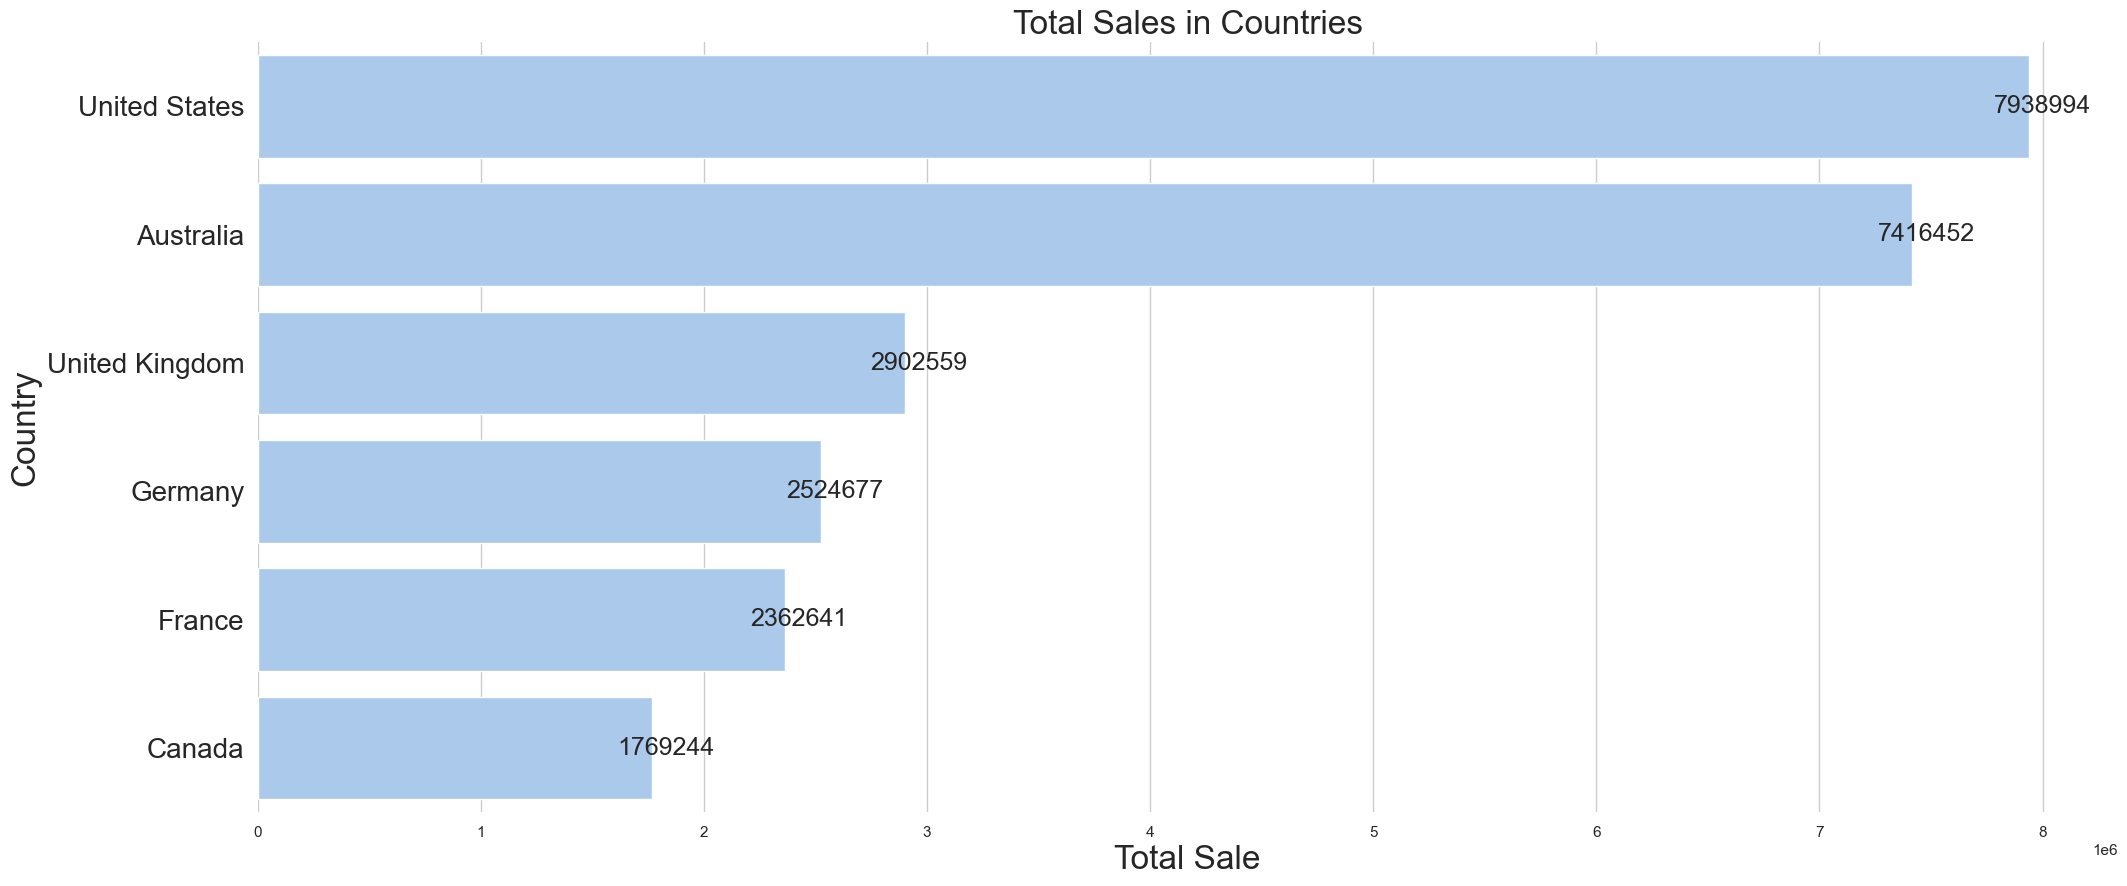

In [244]:
sns.set_theme(style='whitegrid', palette='pastel', color_codes=True)

f, ax = plt.subplots(figsize=(24, 10))

barplot = sns.barplot(x='total_sale', y='country', data=rank_country, ax=ax, color='b')

for p in barplot.patches:
    ax.annotate(format(p.get_width(), '.0f'),
               (p.get_width(), p.get_y() + p.get_height() / 2),
               ha='center' ,va= 'center',
               fontsize=18,
               xytext= (10,0),
               textcoords='offset points')
ax.tick_params(axis='y', labelsize=20)

plt.title('Total Sales in Countries', fontsize =24)
plt.xlabel('Total Sale', fontsize = 24)
plt.ylabel('Country', fontsize = 24)
sns.despine(left=True, bottom=True)

plt.show()

## In which age group does the highest sale occur?

In [245]:
#sale by age bracket

#convert date column to date datatype
customer['birth_date'] = pd.to_datetime(customer['birth_date'])

#create reference with the last day of december 
reference_date = pd.to_datetime('2017-12-30')

#subtract birth_dates from reference
customer['age'] = (reference_date - customer['birth_date']).dt.days // 365

        
def assign_age_bracket(age):
    if 35 <= age <= 50:
        return 'Middle-aged Adults'
    elif 51 <= age <= 65:
        return 'Senior Adults'
    elif 66 <= age:
        return 'Senior Citizen'
    else:
        return 'unknown'
    
    
customer['age_bracket']= customer['age'].apply(assign_age_bracket)

#merge customer and sale dataframes
sale_customer = sale.merge(customer, how= 'outer')

#create total cost order_quantity*unit_price_sold
sale_customer['total_sale']= sale_customer['order_quantity']*sale_customer['unit_price_sold']

#print(sale_customer)


#drop NA order_quantity
age_range_bracket=sale_customer.dropna(subset='unit_price_sold')


#call on the needed columns
age_range_bracket =age_range_bracket[['age_bracket','order_quantity','unit_price_sold','total_sale']]


age_range_bracket=age_range_bracket.groupby('age_bracket')['total_sale'].sum().reset_index()

age_range_bracket=age_range_bracket.sort_values('total_sale', ascending=False)

age_range_bracket_format=age_range_bracket.sort_values('total_sale', ascending=False)

age_range_bracket_format['total_sale']=age_range_bracket.apply(lambda x: '{:,.2f}'.format(x['total_sale']), axis=1 )



print(age_range_bracket_format)






          age_bracket     total_sale
1       Senior Adults  11,196,749.53
0  Middle-aged Adults  10,036,587.52
2      Senior Citizen   3,681,230.13


#### Barchart

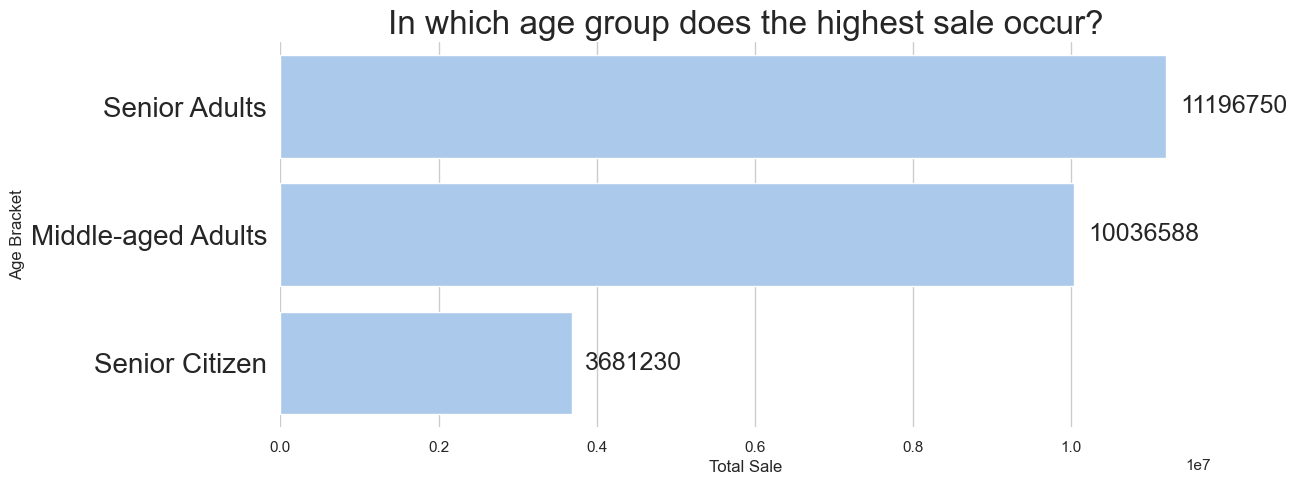

In [246]:
f,ax = plt.subplots(figsize=(12,5))

sns.set_color_codes(palette ='pastel')

barplot = sns.barplot(x='total_sale', y='age_bracket', data=age_range_bracket, ax=ax, color='b')


for p in barplot.patches:
     ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha = 'left', va='center',
                fontsize = 18,
                xytext = (10,0),
                textcoords = 'offset points') 
        
plt.title('In which age group does the highest sale occur?', fontsize = 24)
plt.xlabel('Total Sale')
plt.ylabel('Age Bracket')

ax.tick_params(axis='y', labelsize=20)

sns.despine(left=True, bottom=True )
plt.show()

## Correlation of Age and the quantity of sales.

In [247]:
sale_count = sale_customer[['age', 'order_quantity', 'gender']]

sale_count = sale_count.dropna()

sale_count=sale_count.groupby(['age','gender']).sum('order_quantity').reset_index()



sale_count

,age,gender,order_quantity
0,37,Female,433.0
1,37,Male,612.0
2,38,Female,636.0
3,38,Male,727.0
4,39,Female,702.0
...,...,...,...
129,104,Male,5.0
130,105,Male,6.0
131,106,Female,4.0
132,106,Male,2.0


Text(0, 0.5, 'Age')

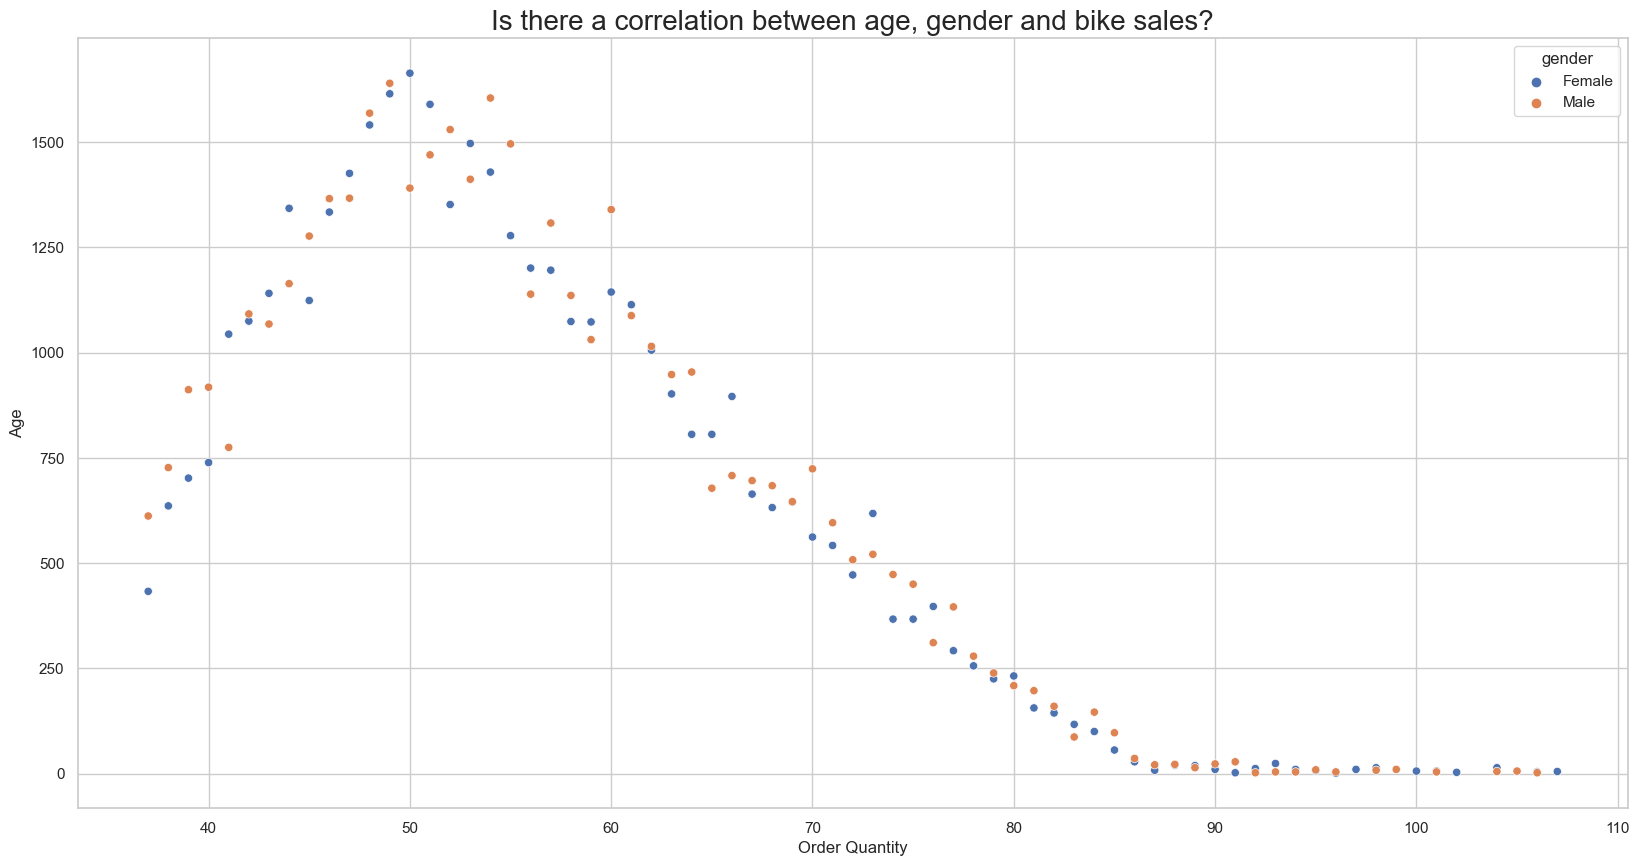

In [248]:
plt.subplots(figsize= (20,10))

sns.scatterplot(x ='age', y='order_quantity', hue='gender', data= sale_count,  palette='deep')

plt.title('Is there a correlation between age, gender and bike sales?', fontsize = 20)
plt.xlabel('Order Quantity')
plt.ylabel('Age')

## Which months have the highest sale and profit?

In [267]:
#total sale and total profit in months

sale_product['total_profit']=sale_product['unit_price_sold']-sale_product['product_cost']
sale_product['total_sale']= sale_product['unit_price_sold']*sale_product['order_quantity']

sale_month = sale_product[['order_date','total_sale','total_profit']]

sale_month = sale_month.dropna(subset =['total_profit'])

number_to_month = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

sale_month = sale_month.groupby(sale_month['order_date'].dt.month).agg({'total_sale':'sum','total_profit':'sum'}).reset_index()

sale_month = sale_month.sort_values('order_date')

sale_month_format = sale_month.sort_values('order_date')

sale_month_format['order_date'] = sale_month_format['order_date'].map(number_to_month)

sale_month_format['total_sale'] = sale_month_format.apply(lambda x: '${:,.2f}'.format(x['total_sale']), axis=1)


sale_month_format['total_profit'] = sale_month_format.apply(lambda x: '${:,.2f}'.format(x['total_profit']),axis=1)




print(sale_month_format)
#print(sale_month)


     



   order_date     total_sale   total_profit
0     January  $2,292,115.58    $942,565.88
1    February  $2,345,628.60    $963,538.48
2       March  $2,563,992.24  $1,054,883.33
3       April  $2,676,133.48  $1,098,313.75
4         May  $2,973,291.59  $1,231,173.73
5        June  $3,030,798.84  $1,250,612.00
6        July  $1,301,470.79    $535,712.21
7      August  $1,340,644.40    $551,347.57
8   September  $1,296,804.77    $536,282.22
9     October  $1,434,095.95    $594,218.56
10   November  $1,460,522.60    $602,049.13
11   December  $2,199,068.34    $907,913.54


In [266]:
print(sale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_date       56046 non-null  datetime64[ns]
 1   stock_date       56046 non-null  datetime64[ns]
 2   order_number     56046 non-null  object        
 3   product_key      56046 non-null  int64         
 4   customer_key     56046 non-null  int64         
 5   territory_key    56046 non-null  int64         
 6   order_line_item  56046 non-null  int64         
 7   order_quantity   56046 non-null  int64         
 8   unit_price_sold  56046 non-null  float64       
 9   order_year       56046 non-null  object        
 10  order_month      56046 non-null  object        
 11  order_day        56046 non-null  object        
 12  name_of_day      56046 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(5), object(5)
memory usage: 5.6+ MB
None


#### Check for correllation amonng the columns in the dataset

In [251]:
sale_product['total_profit']=sale_product['unit_price_sold']-sale_product['product_cost']
sale_product['total_sale']= sale_product['unit_price_sold']*sale_product['order_quantity']

sale_product = sale_product.dropna(subset=['order_date'])



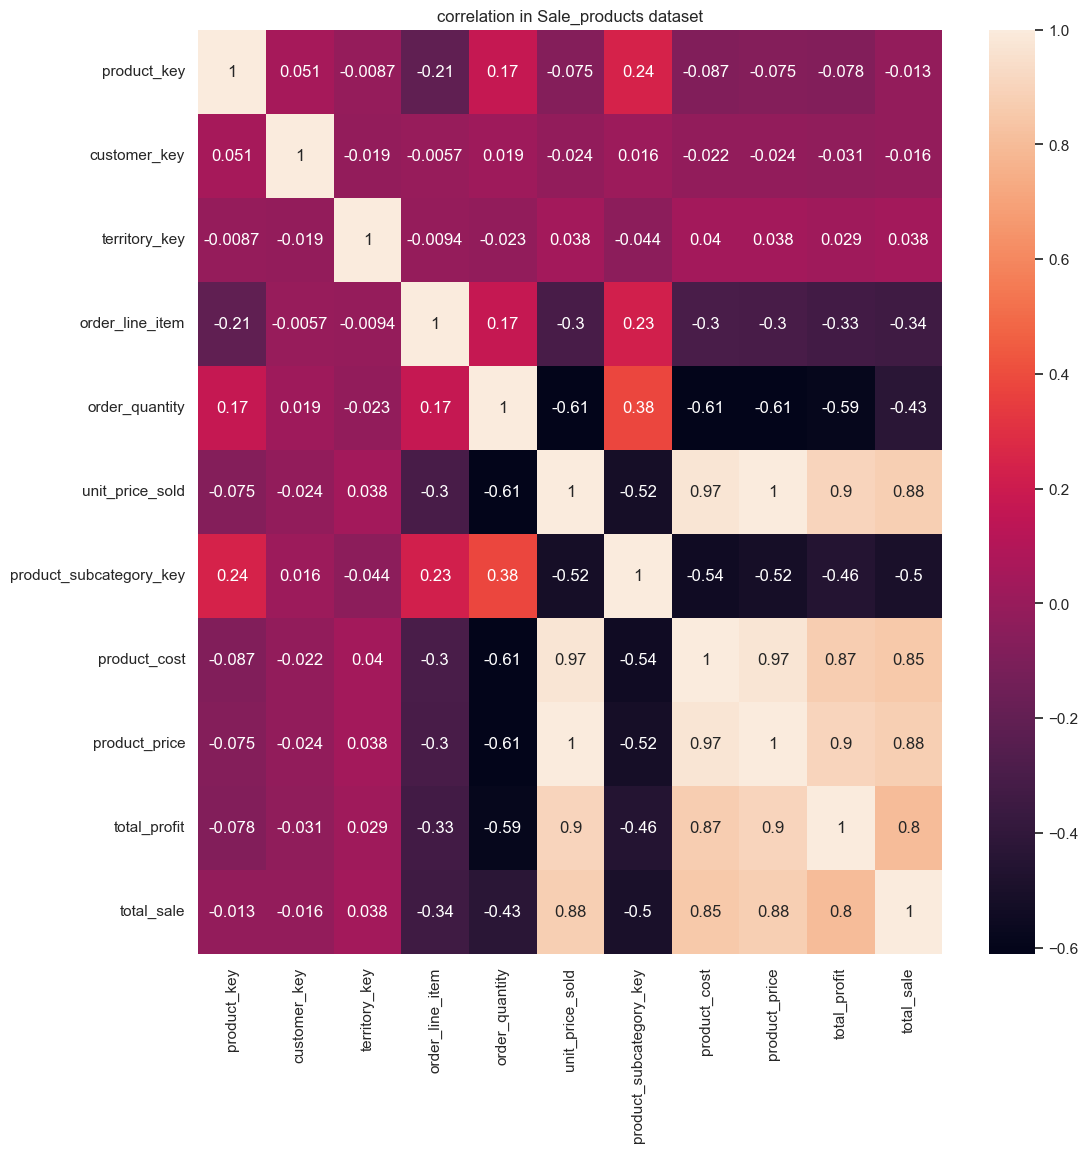

In [252]:
sale_product_corr = sale_product.corr(numeric_only=True, method = 'kendall')


sns.set_theme(style='whitegrid')
plt.subplots(figsize = (12,12))
sns.heatmap(data = sale_product_corr, annot=True )

plt.title('correlation in Sale_products dataset')

plt.show()

#### Correlation in Sale_customer dataframe

<Axes: >

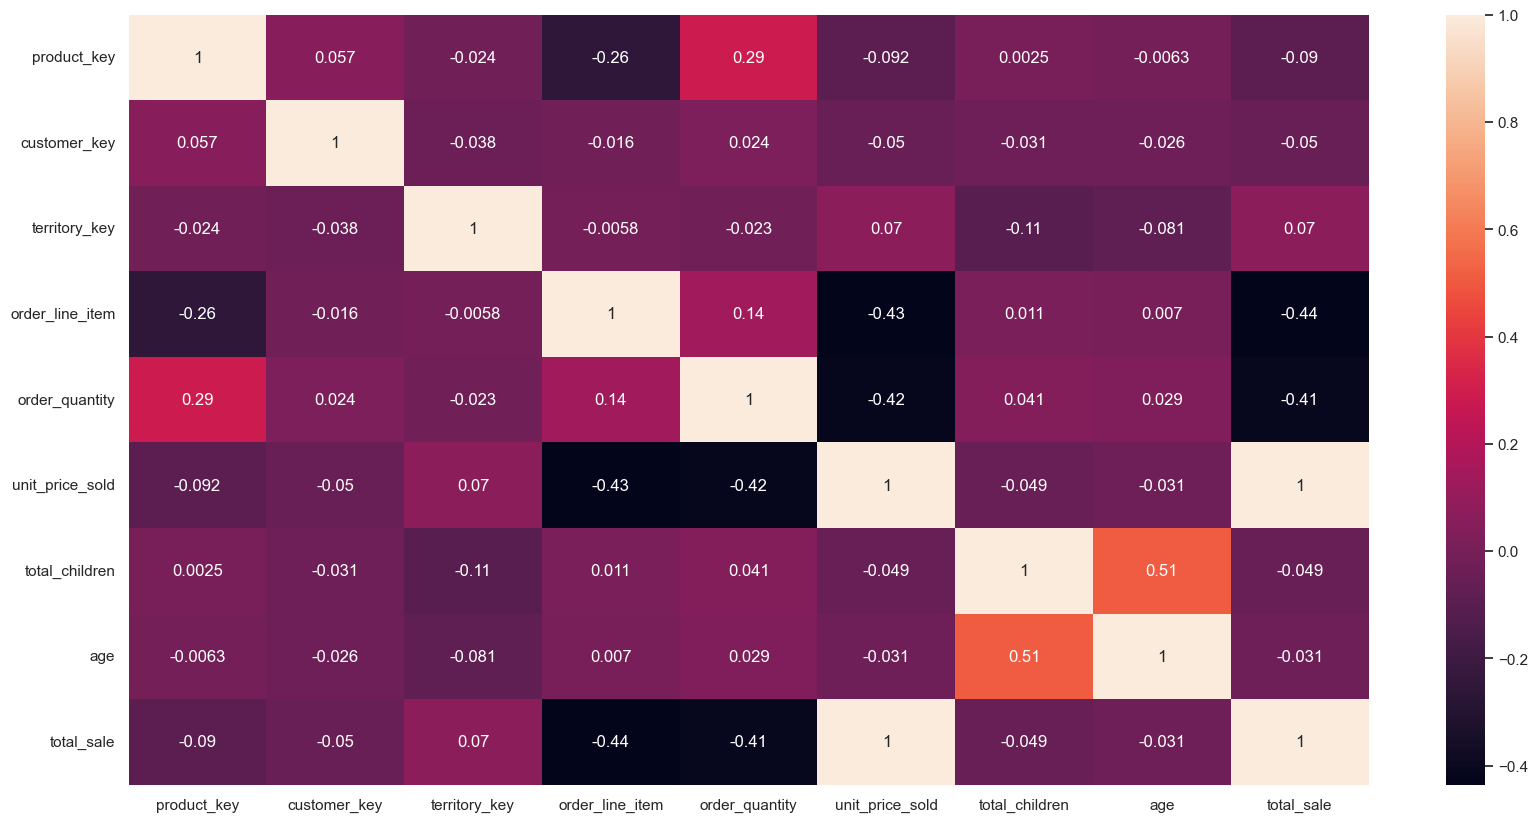

In [254]:
plt.subplots(figsize=(20,10))

sale_customer_corr = sale_customer.corr(numeric_only=True)
sale_customer_corr


sns.heatmap(sale_customer_corr, annot=True)

#### Barchart

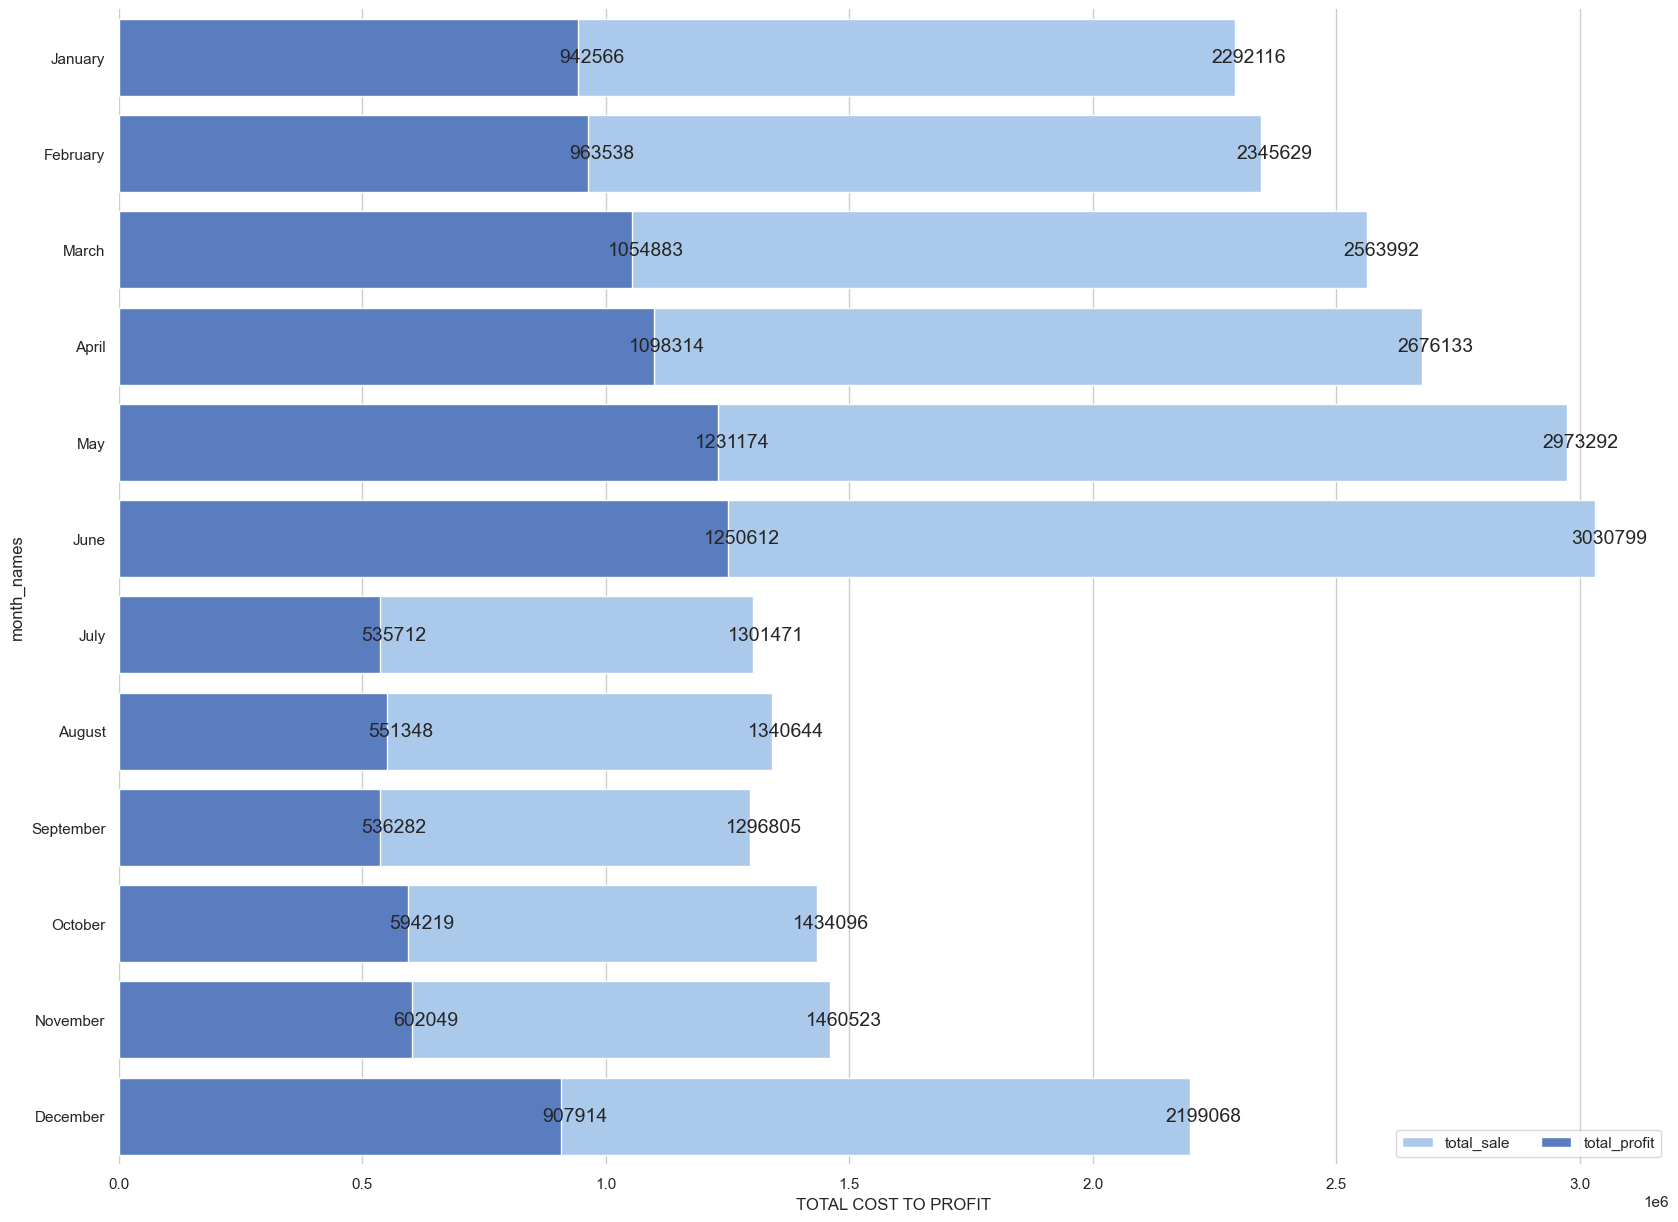

In [269]:
sns.set_theme(style='whitegrid')
import calendar
#month_names = [calendar.month_name[i] for i in range(1, 13)]


f, ax = plt.subplots(figsize = (20,15))

sns.set_color_codes('pastel')
barcost = sns.barplot(x='total_sale', y='order_date', data=sale_month, label='total_sale', color='b', orient='h')


sns.set_color_codes('muted')
barprofit = sns.barplot(x='total_profit',y='order_date', data=sale_month, label='total_profit', color='b', orient='h')

for p in barprofit.patches:
    ax.annotate(format(p.get_width(), '.0f'),
               (p.get_width(), p.get_y() + p.get_height()/2),
               ha = 'center', va = 'center',
               fontsize = 14,
               xytext = (10,0),
               textcoords = 'offset points')
                   

ax.legend(ncol=2, loc='lower right', frameon=True)  
ax.set( ylabel= 'month_names', xlabel= 'TOTAL COST TO PROFIT')

sns.despine(left=True, bottom=True)
ax.set_yticklabels(month_names)

plt.show()







#### Regression Plot
#### Correllation between product cost and profit

<Axes: xlabel='product_cost', ylabel='total_profit'>

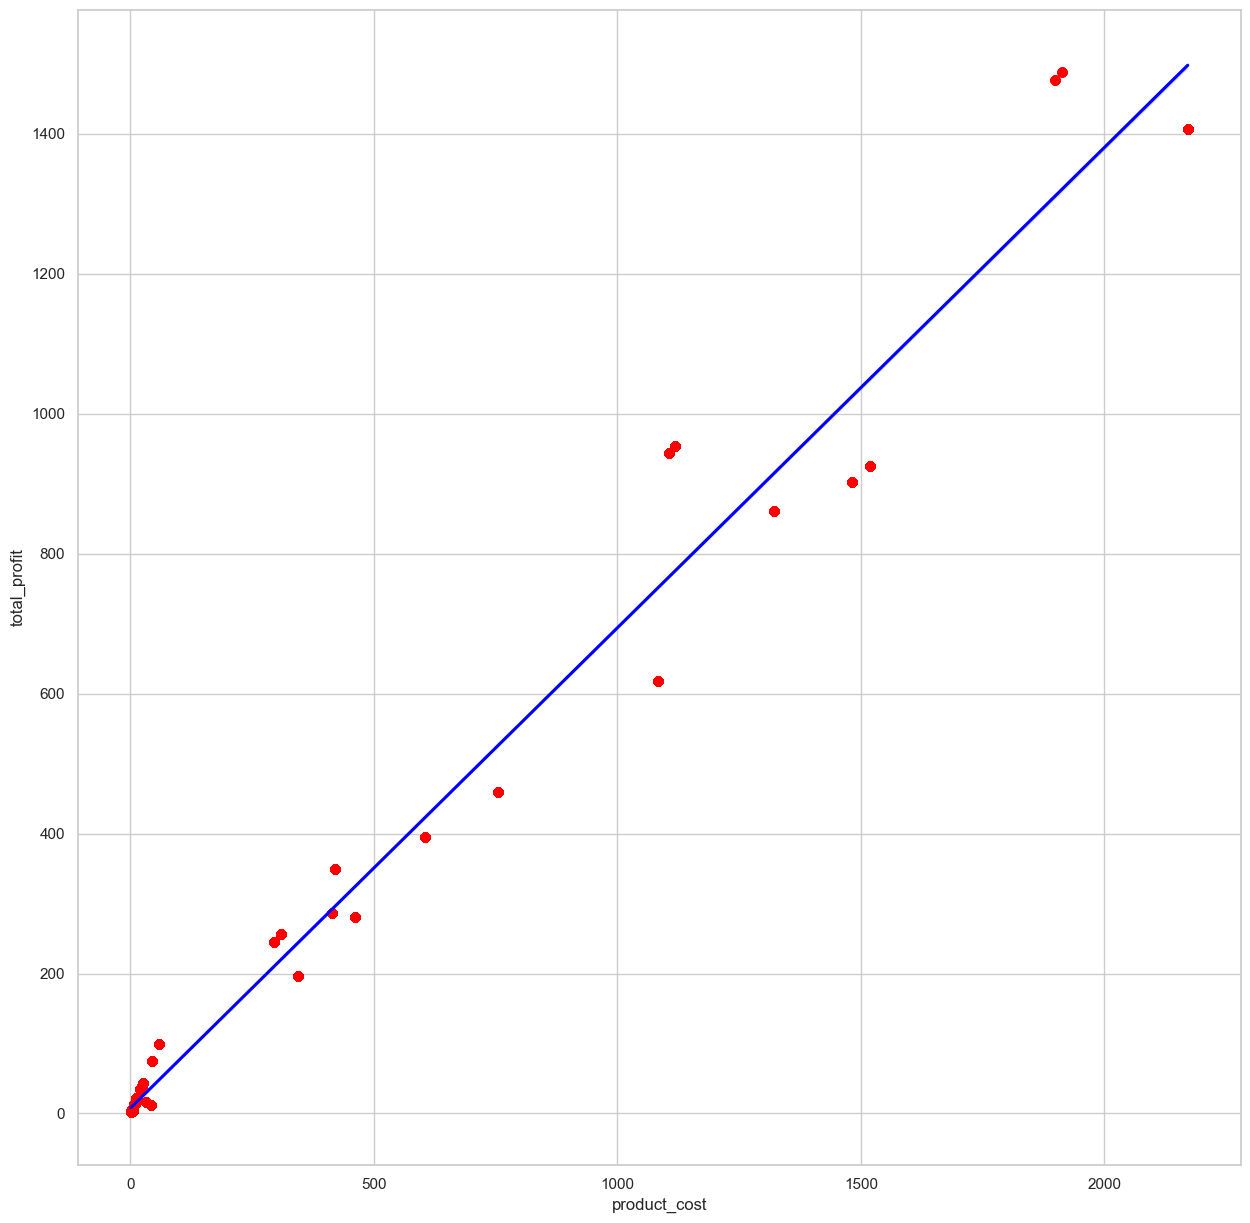

In [270]:
#correllation of product_cost and total profit.
#Higher product cost correllates to higher profits.


sale_product['total_profit']=sale_product['unit_price_sold']-sale_product['product_cost']


sns.set_theme(style='whitegrid')
f, ax = plt.subplots(figsize = (15,15))
sns.set_color_codes('pastel')



sns.regplot(x='product_cost', y= 'total_profit', scatter_kws={'color':'red'}, line_kws={'color':'blue'}, data=sale_product)



#### Line Plot show the months of the year where higher sales occur

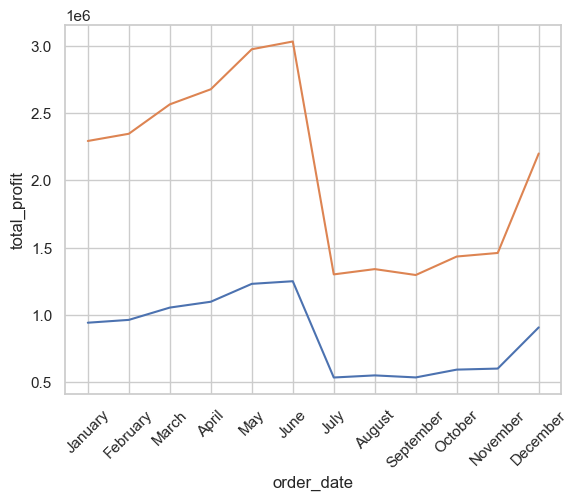

In [271]:
import calendar

month_names = [calendar.month_name[i] for i in range(1, 13)]

sns.lineplot(y='total_profit', x='order_date', data=sale_month, errorbar=None)
sns.lineplot(y='total_sale', x='order_date', data=sale_month, errorbar=None)

plt.xticks(ticks=sale_month['order_date'], labels=month_names,rotation=45)
plt.show()

#### Pie graph shows the chunk of purchase done buy gender

In [272]:
sale_customer=sale.merge(customer, how='outer')

gender_dict={'M': 'male',
            'F': 'female'}

sale_customer['total_sale']= sale_customer['unit_price_sold']*sale_customer['order_quantity']

sale_customer_gender=sale_customer[['gender','total_sale']]

sale_customer_gender=sale_customer_gender.groupby('gender')['total_sale'].sum().reset_index()

sale_customer_gender_format=sale_customer_gender.groupby('gender')['total_sale'].sum().reset_index()

#sale_customer_gender_format['total_sale']=sale_customer_gender_format.apply(lambda x: '{:,.2f}'.format(x['total_sale']), axis=1)



print(sale_customer_gender)



   gender   total_sale
0  Female  12515041.59
1    Male  12243611.67


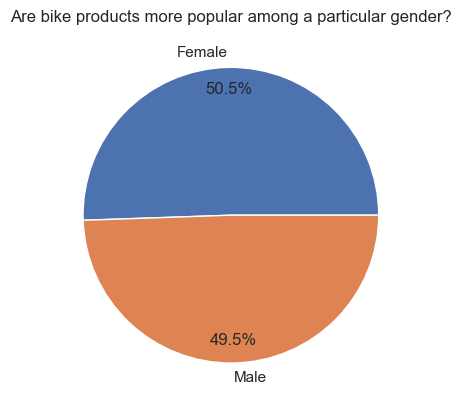

In [273]:
import matplotlib.pyplot as plt

# Plot the pie chart
plt.pie(sale_customer_gender['total_sale'], labels=sale_customer_gender['gender'], autopct='%1.1f%%', pctdistance=0.85)

# Add a title
plt.title('Are bike products more popular among a particular gender?')

# Show the plot
plt.show()


In [274]:

sale_customer = sale_customer.dropna()
quantity_corr = sale_customer[['order_quantity', 'unit_price_sold']]
quantity_corr = quantity_corr.groupby(['unit_price_sold']).sum('order_quantity').reset_index()
quantity_corr

#sale_customer

,unit_price_sold,order_quantity
0,2.29,5855.0
1,3.99,4282.0
2,4.99,16277.0
3,7.95,1692.0
4,8.64,4117.0
5,8.99,4373.0
6,9.99,3784.0
7,21.49,1882.0
8,21.98,3925.0
9,23.55,2621.0


#### Regplot shows an inverse correlation between the unit price and order quantity.

C:\Users\louie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


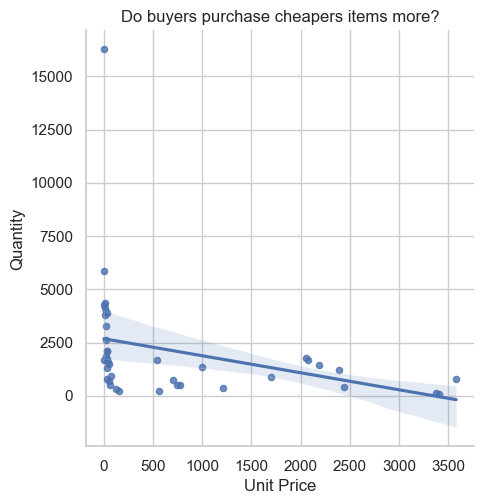

In [275]:
#Buyer purchase more cheaper items that expensive ones.

sns.lmplot(x='unit_price_sold', y='order_quantity', data=quantity_corr, scatter_kws={'s':20}, height=5)

plt.title('Do buyers purchase cheapers items more?')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()